## Install library dan import

In [ ]:
# Install Biopython, Matplotlib, and Pandas
!pip install biopython
!pip install matplotlib
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import os

## Definisi model
1. Model 1 adalah model vaksin subunit protein dengan konfigurasi LFn - linker - PA (tanpa mutagenesis)
2. Model 2 adalah model vaksin subunit protein dengan konfigurasi konfigurasi LFn - linker - PA (mutagenesis)
3. Model 3 adalah model vaksin multiepitope dengan konfigurasi Adjuvant - Linker - PAMHC1 - Linker - LFnMHC1 - Linker - PAMHC2 - Linker - LFnMHC2
4. Model 4 adalah model vaksin multiepitope dengan konfigurasi Adjuvant - Linker - PAMHC2 - Linker - LFnMHC2 - Linker - PAMHC1 - Linker - LFnMHC1

## Plot untuk parameter Radius of Gyration (Rg)


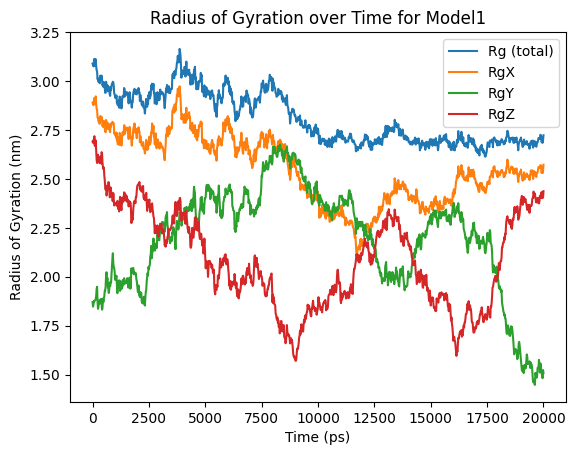

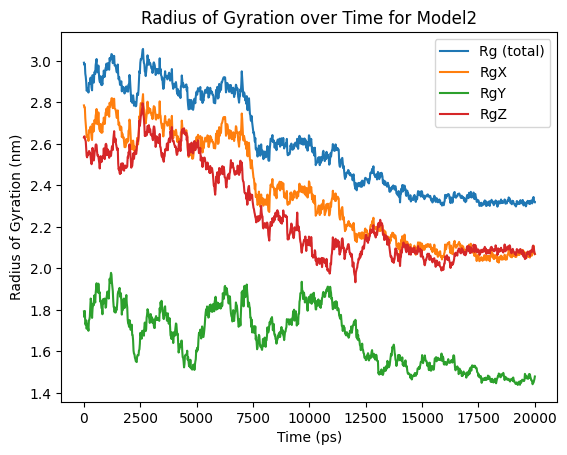

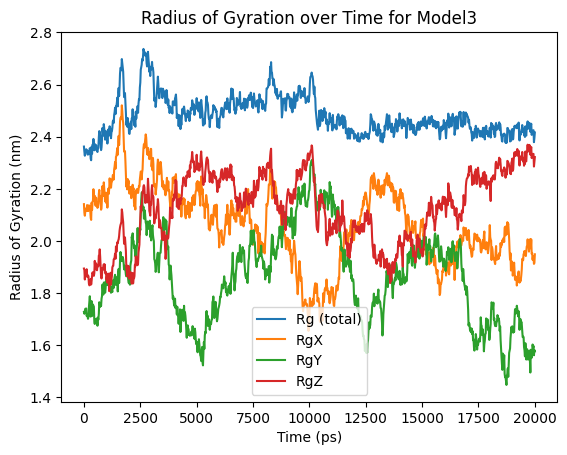

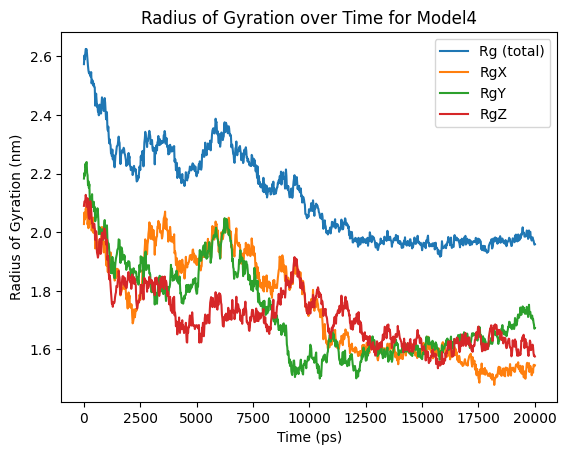

In [ ]:
# Fungsi untuk membaca file .xvg dengan beberapa kolom data
def read_xvg(filename):
    time = []
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith(('@', '#')):
                continue
            columns = line.split()
            time.append(float(columns[0]))               # Kolom waktu
            values = [float(val) for val in columns[1:]] # Kolom data
            data.append(values)
    data = list(map(list, zip(*data)))  # Transpose data agar per kolom
    return time, data

# Daftar file yang ingin dibaca
file_paths1 = [
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAtanpamutagenesis_relaxed_rank_001/gyrate_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAmutagenesis_relaxed_rank_001/gyrate_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC1LinkerLFnMHC1LinkerPAMHC2LinkerLFnMHC2_relaxed_rank_001/gyrate_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC2LinkerLFnMHC2LinkerPAMHC1LinkerLFnMHC1_relaxed_rank_001/gyrate_mdsim.xvg'
]

# Membaca data dari setiap file dan membuat plot
for index, file_path in enumerate(file_paths1):
    time, data = read_xvg(file_path)

    # Membuat plot untuk setiap kolom data
    plt.figure()
    plt.plot(time, data[0], label='Rg (total)')
    plt.plot(time, data[1], label='RgX')
    plt.plot(time, data[2], label='RgY')
    plt.plot(time, data[3], label='RgZ')

    # Menambahkan label dan judul
    plt.xlabel('Time (ps)')
    plt.ylabel('Radius of Gyration (nm)')
    plt.title(f'Radius of Gyration over Time for Model{index + 1}')
    plt.legend()
    plt.show()


## Plot untuk parameter jumlah ikatan hidrogen (H-bonds)

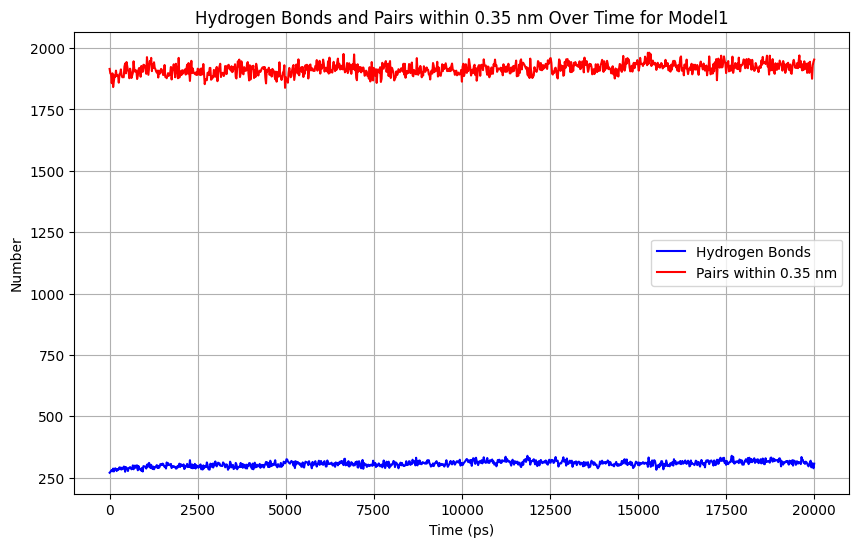

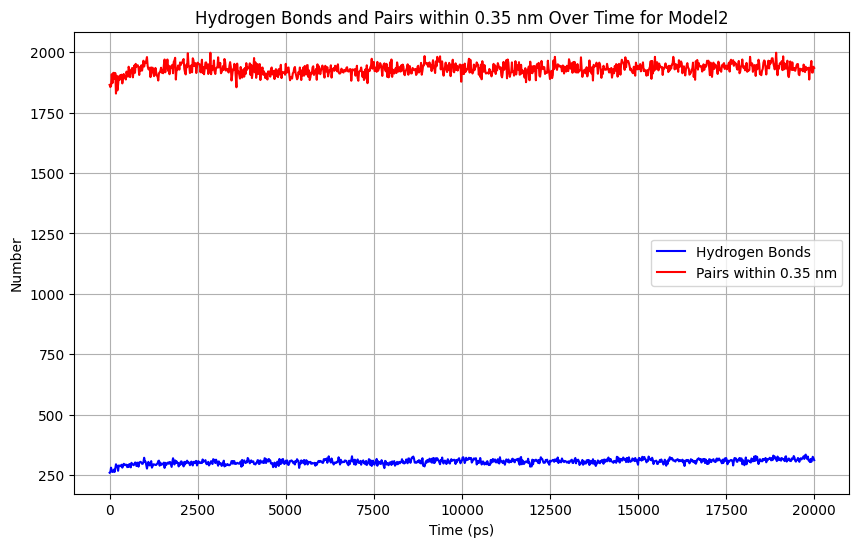

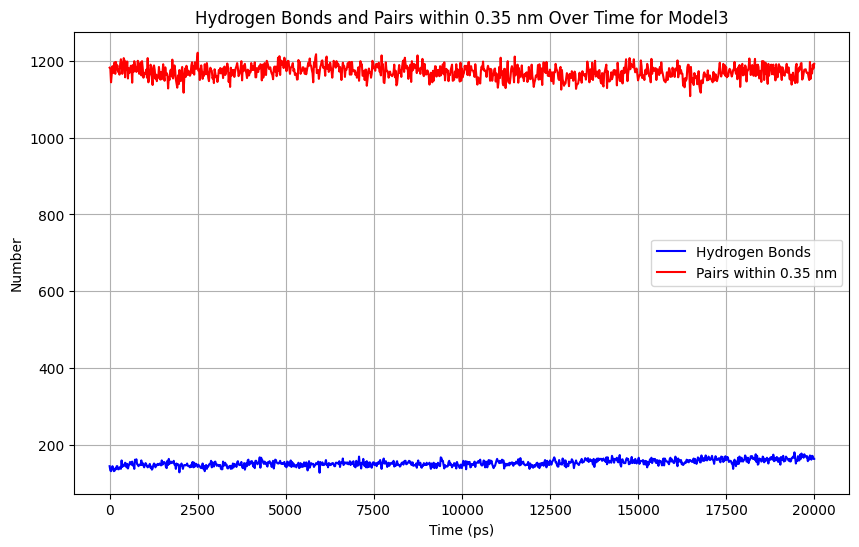

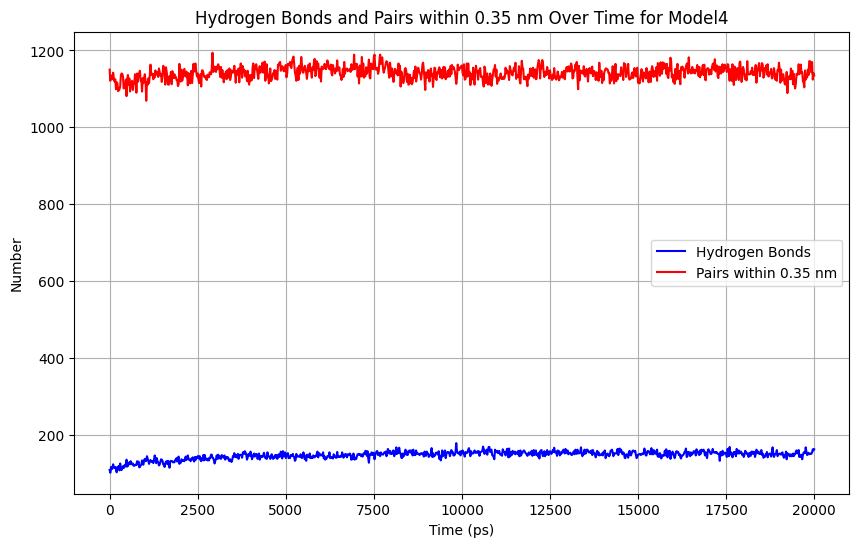

In [ ]:
# Fungsi untuk membaca dan memisahkan data dari file .xvg
def read_xvg(file_path):
    data = np.loadtxt(file_path, comments=['@', '#'])
    time = data[:, 0]               # Kolom pertama sebagai waktu
    hydrogen_bonds = data[:, 1]     # Kolom kedua untuk "Hydrogen bonds"
    pairs_within_035nm = data[:, 2] # Kolom ketiga untuk "Pairs within 0.35 nm"
    return time, hydrogen_bonds, pairs_within_035nm

# Daftar file yang ingin dibaca
file_paths = [
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAtanpamutagenesis_relaxed_rank_001/hbond_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAmutagenesis_relaxed_rank_001/hbond_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC1LinkerLFnMHC1LinkerPAMHC2LinkerLFnMHC2_relaxed_rank_001/hbond_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC2LinkerLFnMHC2LinkerPAMHC1LinkerLFnMHC1_relaxed_rank_001/hbond_mdsim.xvg'
]

# Membaca data dari setiap file dan membuat plot
for index, file_path in enumerate(file_paths):
    # Membaca data dari file
    time, hydrogen_bonds, pairs_within_035nm = read_xvg(file_path)

    # Membuat plot
    plt.figure(figsize=(10, 6))
    plt.plot(time, hydrogen_bonds, label="Hydrogen Bonds", color='b')
    plt.plot(time, pairs_within_035nm, label="Pairs within 0.35 nm", color='r')

    # Menambahkan label dan judul
    plt.xlabel("Time (ps)")
    plt.ylabel("Number")
    plt.title(f"Hydrogen Bonds and Pairs within 0.35 nm Over Time for Model{index + 1}")
    plt.legend()
    plt.grid()
    plt.show()


## Plot untuk parameter Root Mean Square Deviation (RMSD)

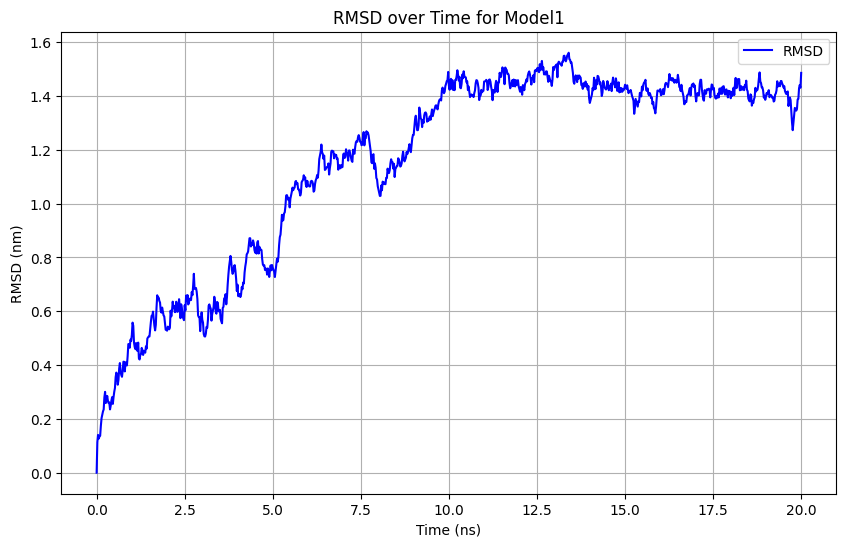

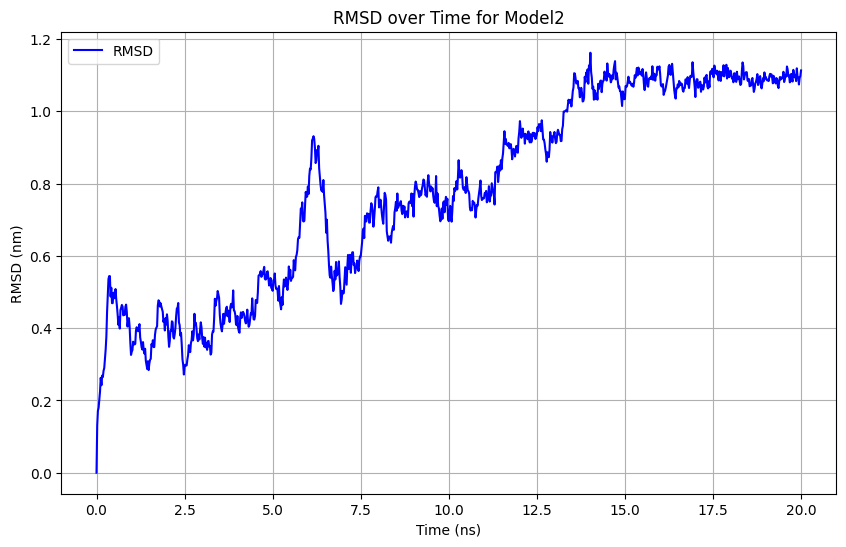

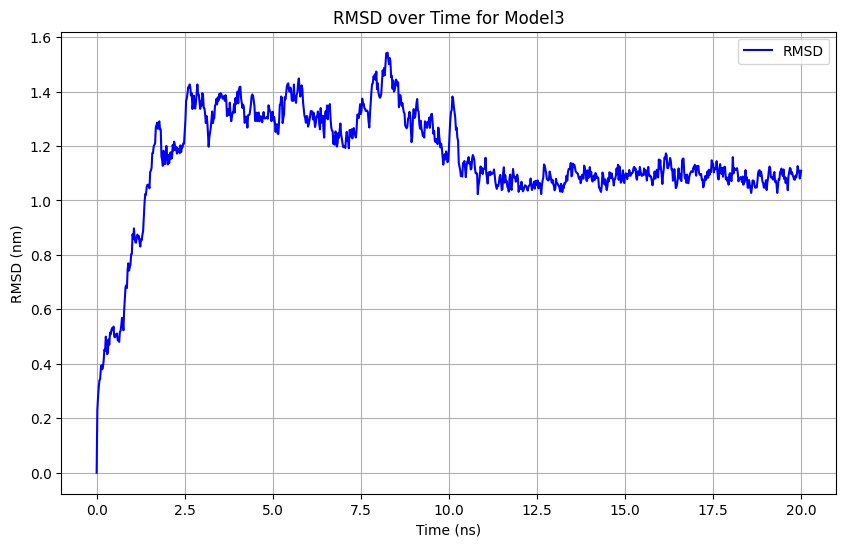

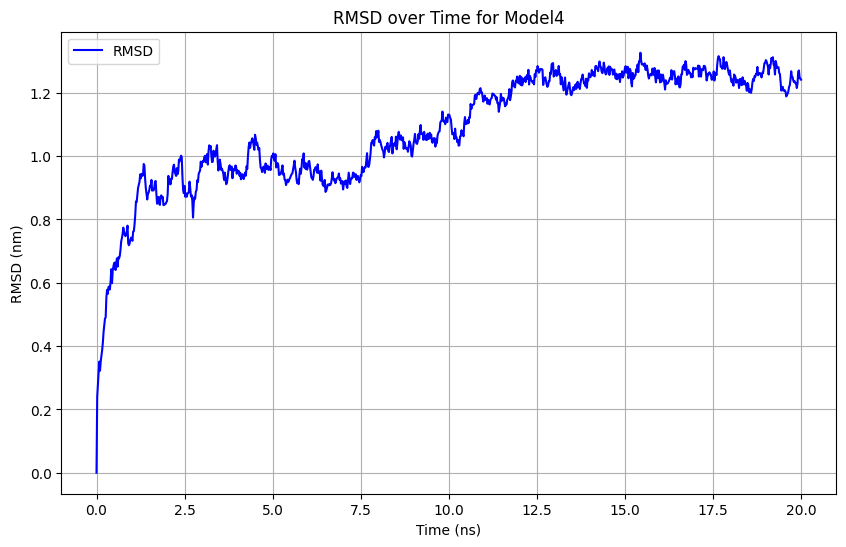

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk membaca dan membuat plot RMSD dari file .xvg
def plot_rmsd(file_path, index):
    # Initialize lists to store time and RMSD values
    time = []
    rmsd = []

    # Read data from file
    with open(file_path, 'r') as file:
        for line in file:
            # Skip comment lines
            if line.startswith('#') or line.startswith('@'):
                continue
            # Split line into columns and append to lists
            columns = line.split()
            time.append(float(columns[0]))
            rmsd.append(float(columns[1]))

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(time, rmsd, label='RMSD', color='b')
    plt.xlabel('Time (ns)')
    plt.ylabel('RMSD (nm)')
    plt.title(f"RMSD over Time for Model{index + 1}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Daftar file yang ingin diproses
file_paths = [
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAtanpamutagenesis_relaxed_rank_001/rmsd_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAmutagenesis_relaxed_rank_001/rmsd_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC1LinkerLFnMHC1LinkerPAMHC2LinkerLFnMHC2_relaxed_rank_001/rmsd_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC2LinkerLFnMHC2LinkerPAMHC1LinkerLFnMHC1_relaxed_rank_001/rmsd_mdsim.xvg'
]

# Membaca data dari setiap file dan membuat plot
for index, file_path in enumerate(file_paths):
    plot_rmsd(file_path, index)


## Plot untuk parameter Root Mean Square Fluctuation (RMSF)

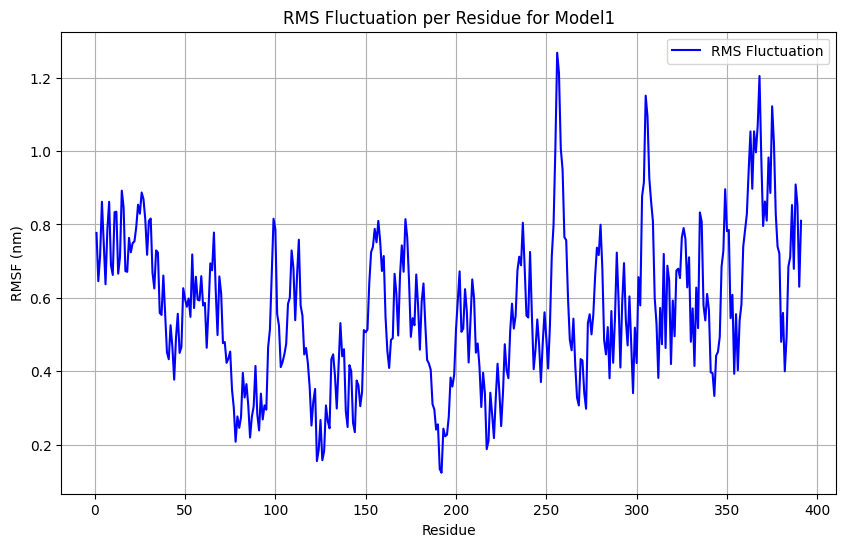

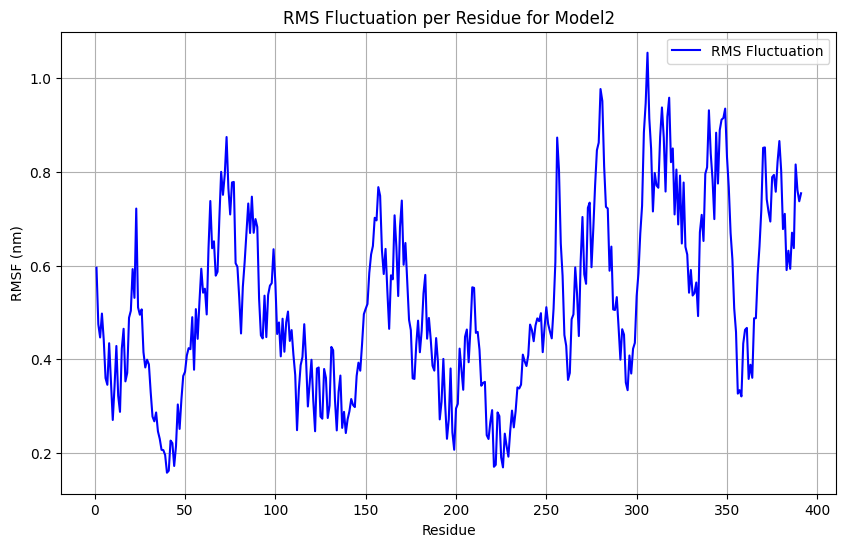

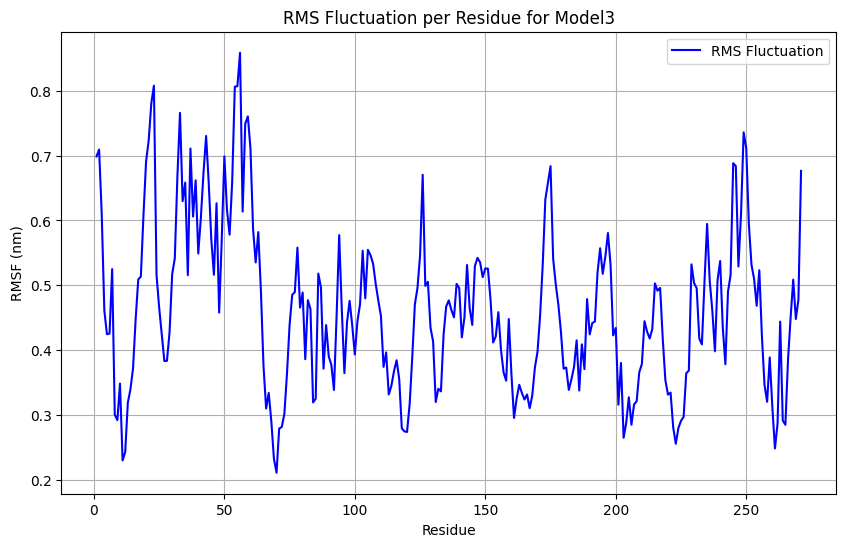

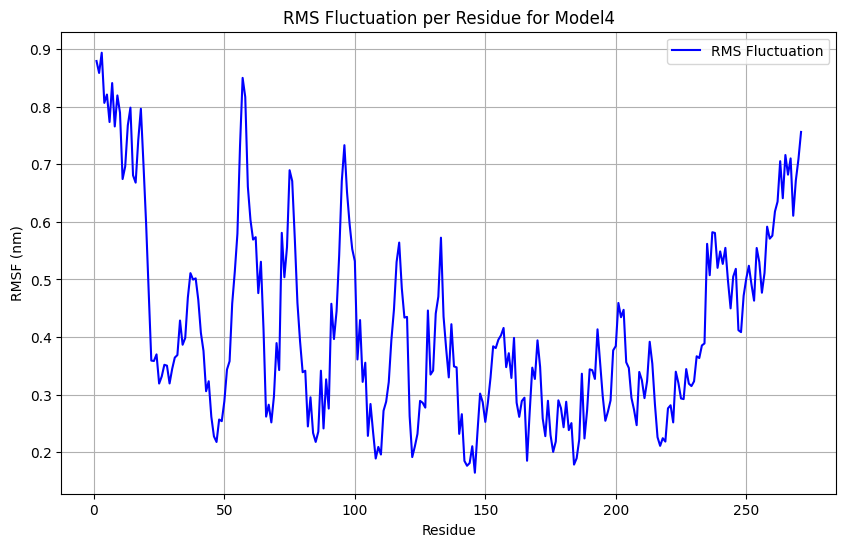

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk membaca file .xvg dan membuat plot RMSF
def plot_rmsf(filename, index):
    # Inisialisasi daftar untuk menyimpan data
    residues = []
    rmsf_values = []

    # Membaca data dari file .xvg
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith(('@', '#')):
                continue
            data = line.split()
            residues.append(int(data[0]))           # Kolom pertama adalah indeks residu
            rmsf_values.append(float(data[1]))      # Kolom kedua adalah nilai RMSF

    # Membuat plot
    plt.figure(figsize=(10, 6))
    plt.plot(residues, rmsf_values, label="RMS Fluctuation", color="b")
    plt.xlabel("Residue")
    plt.ylabel("RMSF (nm)")
    plt.title(f"RMS Fluctuation per Residue for Model{index + 1}")
    plt.legend()
    plt.grid()
    plt.show()

# Daftar file yang ingin diproses
file_paths = [
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAtanpamutagenesis_relaxed_rank_001/rmsf_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAmutagenesis_relaxed_rank_001/rmsf_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC1LinkerLFnMHC1LinkerPAMHC2LinkerLFnMHC2_relaxed_rank_001/rmsf_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC2LinkerLFnMHC2LinkerPAMHC1LinkerLFnMHC1_relaxed_rank_001/rmsf_mdsim.xvg'
]

# Loop untuk membuat plot untuk setiap file
for index, file_path in enumerate(file_paths):
    plot_rmsf(file_path, index)


## Plot untuk parameter Solvent Accessible Surface Area (SASA)

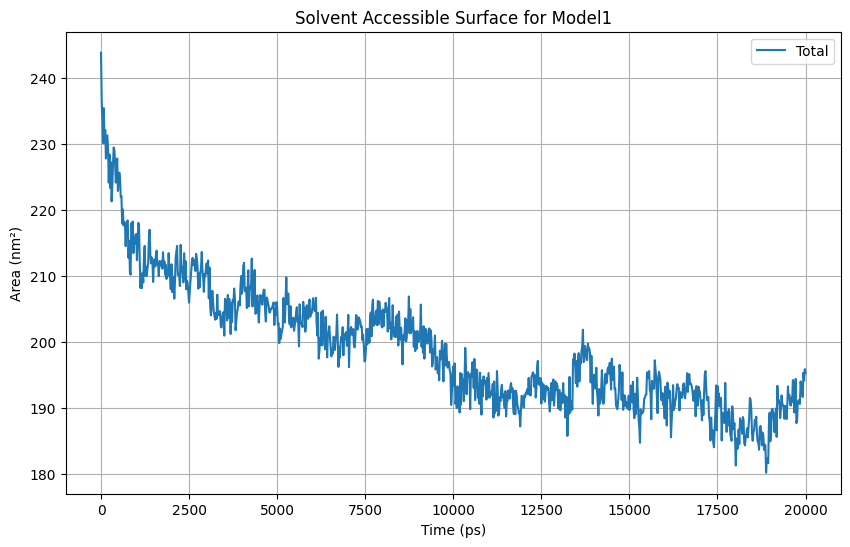

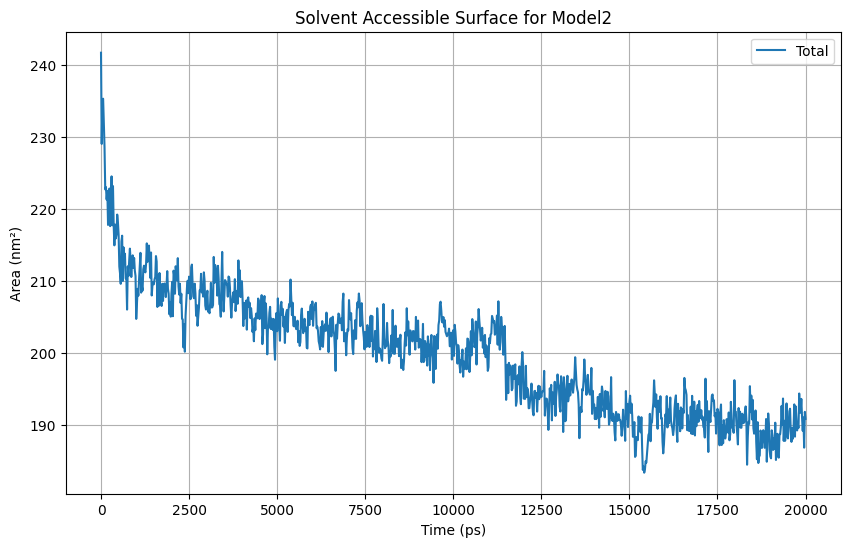

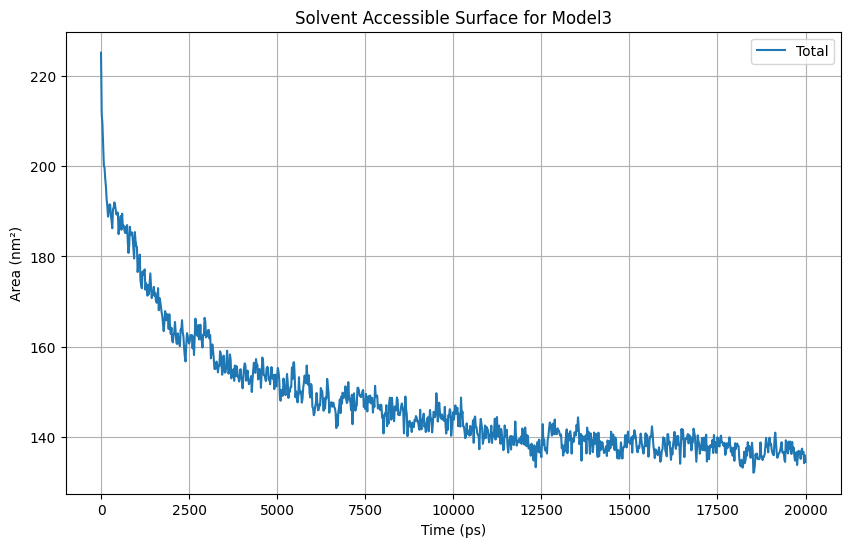

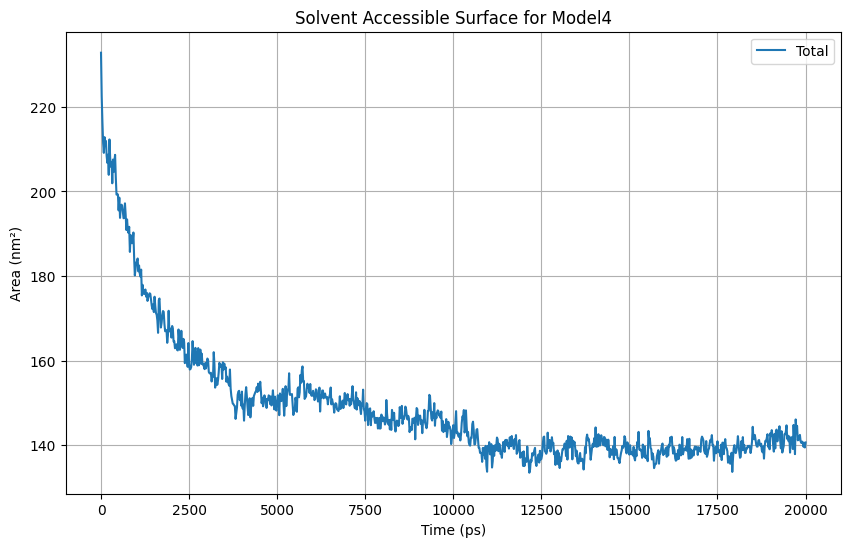

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk membaca file .xvg dan mengembalikan DataFrame
def read_xvg(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Abaikan baris yang dimulai dengan @ atau #
            if line.startswith('@') or line.startswith('#'):
                continue
            # Pisahkan nilai dalam baris
            values = line.split()
            # Pastikan hanya baris dengan dua nilai (time dan area) yang diproses
            if len(values) == 2:
                try:
                    time = float(values[0])
                    area = float(values[1])
                    data.append([time, area])
                except ValueError:
                    # Abaikan baris yang tidak bisa dikonversi menjadi angka
                    continue
    # Konversi data menjadi DataFrame
    df = pd.DataFrame(data, columns=['Time (ps)', 'Area (nm²)'])
    return df

# Daftar file yang ingin diproses
file_paths = [
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAtanpamutagenesis_relaxed_rank_001/sas_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAmutagenesis_relaxed_rank_001/sas_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC1LinkerLFnMHC1LinkerPAMHC2LinkerLFnMHC2_relaxed_rank_001/sas_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC2LinkerLFnMHC2LinkerPAMHC1LinkerLFnMHC1_relaxed_rank_001/sas_mdsim.xvg'
]

# Membaca data dari setiap file dan membuat plot
for index, file_path in enumerate(file_paths):
    df = read_xvg(file_path)

    # Plot data
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (ps)'], df['Area (nm²)'], label='Total')
    plt.xlabel('Time (ps)')
    plt.ylabel('Area (nm²)')
    plt.title(f'Solvent Accessible Surface for Model{index + 1}')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


## Plot untuk parameter Solvent Accessible Surface Area (SASA) per residu

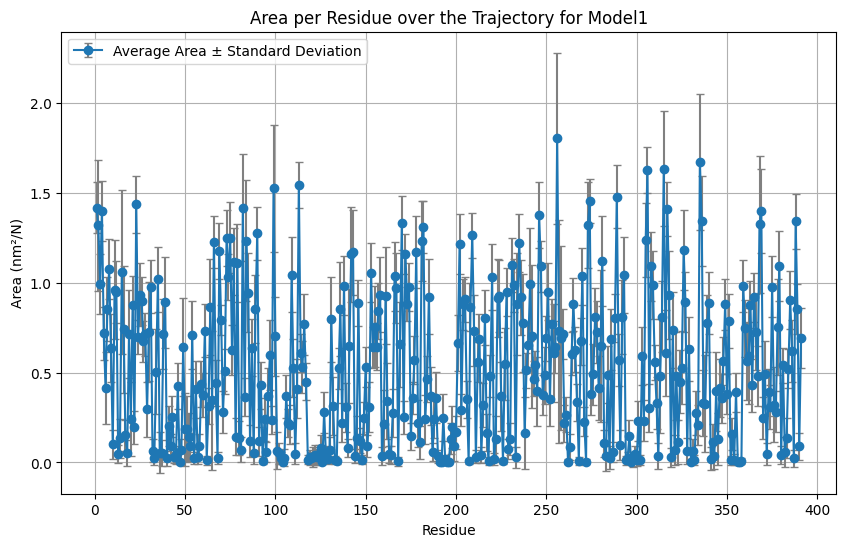

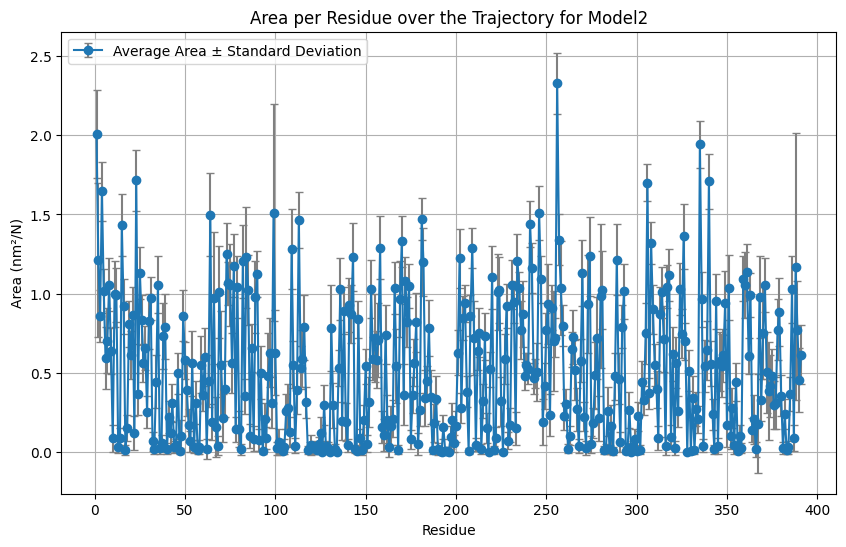

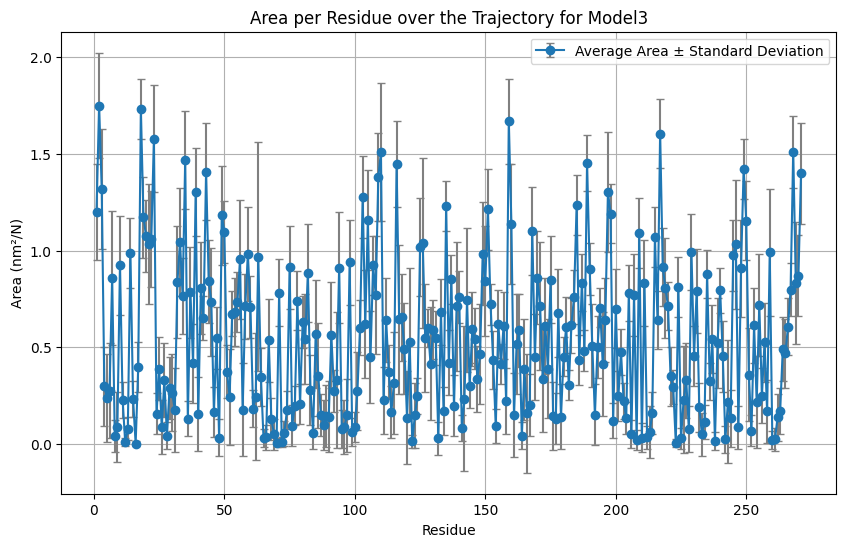

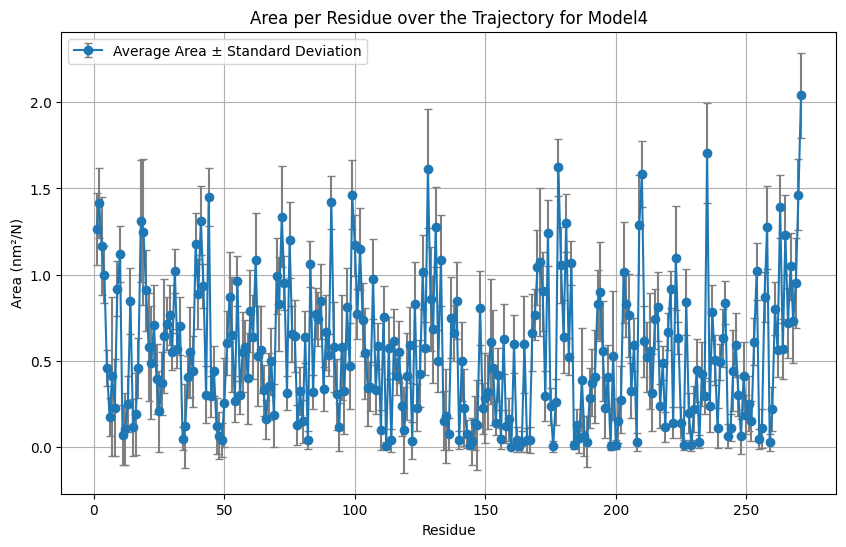

In [ ]:
# Fungsi untuk membaca file .xvg dan membuat plot
def plot_residue_area(filename, index):
    # Mengabaikan baris yang dimulai dengan '#' atau '@' yang merupakan komentar
    data = np.loadtxt(filename, comments=('@', '#'))

    # Memisahkan kolom untuk plot
    residues = data[:, 0]
    average_area = data[:, 1]
    std_dev = data[:, 2]

    # Membuat plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(residues, average_area, yerr=std_dev, fmt='o-', ecolor='gray', capsize=3, label="Average Area ± Standard Deviation")

    # Menambahkan judul dan label sumbu
    plt.title(f"Area per Residue over the Trajectory for Model{index + 1}")
    plt.xlabel("Residue")
    plt.ylabel("Area (nm²/N)")

    # Menambahkan legenda
    plt.legend()

    # Menampilkan plot
    plt.grid(True)
    plt.show()

# Daftar file yang ingin diproses
file_paths = [
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAtanpamutagenesis_relaxed_rank_001/sas_resarea_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAmutagenesis_relaxed_rank_001/sas_resarea_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC1LinkerLFnMHC1LinkerPAMHC2LinkerLFnMHC2_relaxed_rank_001/sas_resarea_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC2LinkerLFnMHC2LinkerPAMHC1LinkerLFnMHC1_relaxed_rank_001/sas_resarea_mdsim.xvg'
]

# Loop untuk membuat plot untuk setiap file
for index, file_path in enumerate(file_paths):
    plot_residue_area(file_path, index)


## Plot untuk parameter volume Solvent Accessible Surface Area (SASA)




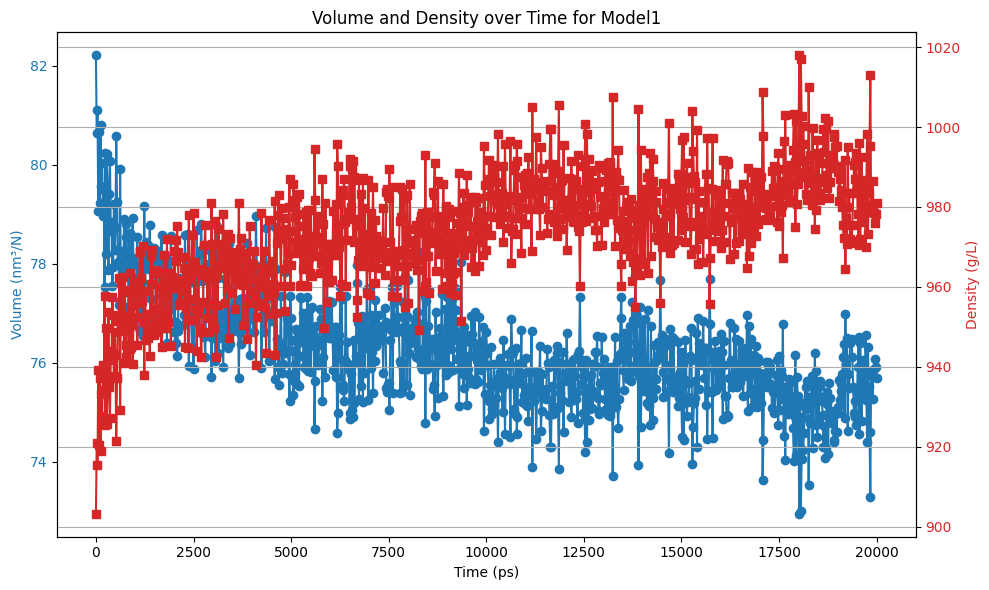

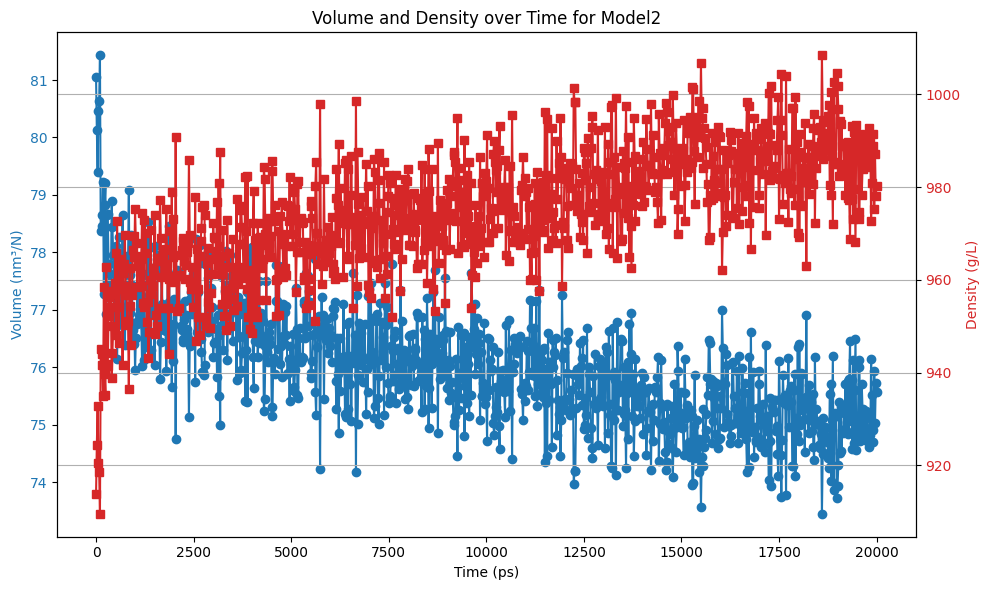

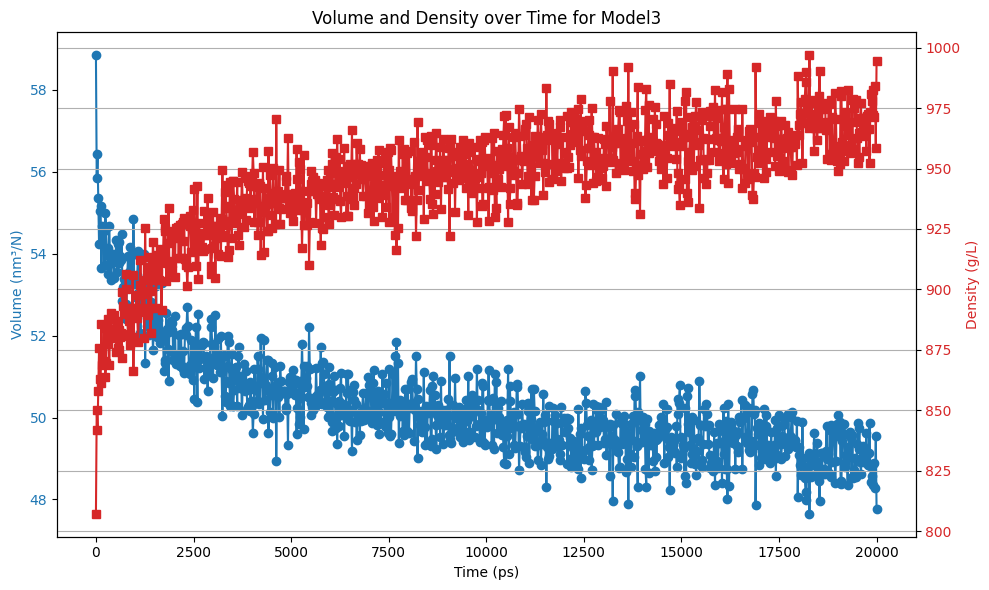

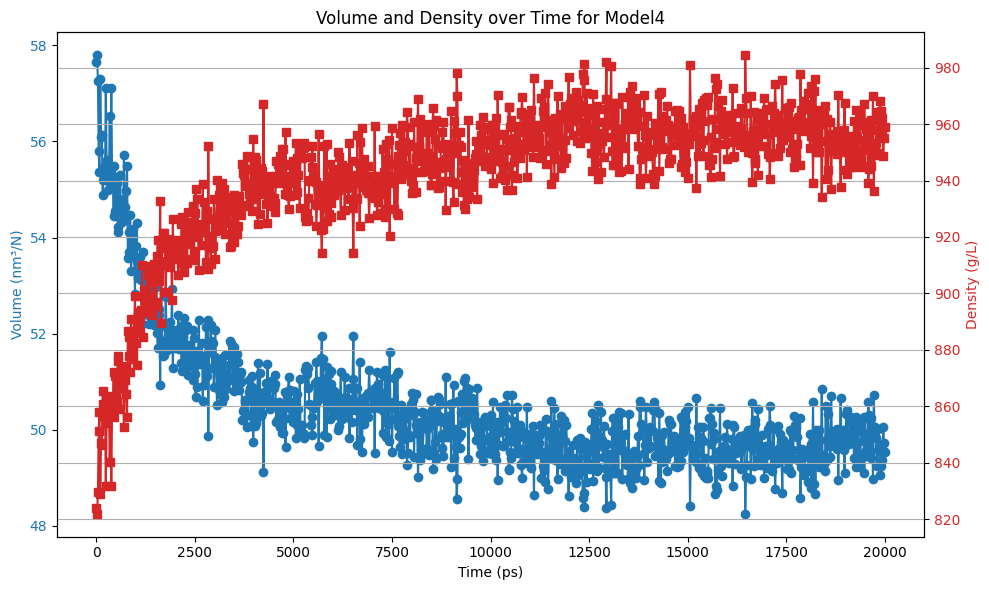

In [ ]:
# Fungsi untuk membaca file .xvg dan membuat plot
def plot_volume_density(filename, index):
    # Mengabaikan baris yang dimulai dengan '#' atau '@' yang merupakan komentar
    data = np.loadtxt(filename, comments=('@', '#'))

    # Memisahkan kolom untuk plot
    time = data[:, 0]
    volume = data[:, 1]
    density = data[:, 2]

    # Membuat plot dengan dua sumbu y
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Volume pada sumbu y pertama
    ax1.set_xlabel("Time (ps)")
    ax1.set_ylabel("Volume (nm³/N)", color='tab:blue')
    ax1.plot(time, volume, 'o-', color='tab:blue', label="Volume")
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Membuat sumbu y kedua untuk Density
    ax2 = ax1.twinx()
    ax2.set_ylabel("Density (g/L)", color='tab:red')
    ax2.plot(time, density, 's-', color='tab:red', label="Density")
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Menambahkan judul
    plt.title(f"Volume and Density over Time for Model{index + 1}")

    # Menampilkan plot
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Daftar file yang ingin diproses
file_paths = [
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAtanpamutagenesis_relaxed_rank_001/sas_volume_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/LFnlinkerPAmutagenesis_relaxed_rank_001/sas_volume_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC1LinkerLFnMHC1LinkerPAMHC2LinkerLFnMHC2_relaxed_rank_001/sas_volume_mdsim.xvg',
    '/content/drive/My Drive/Gamanthrax/MDAnalysis/AdjuvantLinkerPAMHC2LinkerLFnMHC2LinkerPAMHC1LinkerLFnMHC1_relaxed_rank_001/sas_volume_mdsim.xvg'
]

# Loop untuk membuat plot untuk setiap file
for index, file_path in enumerate(file_paths):
    plot_volume_density(file_path, index)
